<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/10.Truncated_SVD_Amazon_Food_Reviews/Truncated_SVD_Amazon_Food_Reviews_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Assignment : Apply Truncated SVD

<ol>
    <li><strong>Apply Truncated-SVD on only this feature set:</strong>
        <ul>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
    <br>
    <li><strong>Procedure:</strong>
        <ul>
    <li>Take top 2000 or 3000 features from tf-idf vectorizers using idf_ score.</li>
    <li>You need to calculate the co-occurrence matrix with the selected features (Note: X.X^T
doesn’t give the co-occurrence matrix, it returns the covariance matrix, check these
        bolgs <a href='https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285'>blog-1,</a> <a href='https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/'>blog-2 </a>for more information)</li>
            <li>You should choose the n_components in truncated svd, with maximum explained
variance. Please search on how to choose that and implement them. (hint: plot of
cumulative explained variance ratio)</li>
            <li>After you are done with the truncated svd, you can apply K-Means clustering and choose
the best number of clusters based on elbow method.</li>
            <li> Print out wordclouds for each cluster, similar to that in previous assignment. </li>
            <li>You need to write a function that takes a word and returns the most similar words using
cosine similarity between the vectors(vector: a row in the matrix after truncatedSVD)</li>
        </ul>
    </li>
    <br>
    
</ol>

###  we already strored the preprocessed_data in a file to know the preprocessing steps visit <a href='https://github.com/Sachin-D-N/Amazon_Food_Reviews/blob/main/01.Amazon_Fine_Food_Review_Analysis_Featurization/Amazon%20Fine%20Food%20Reviews%20Analysis.ipynb'>here </a>

In [ ]:
#loading Libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the preprocessed data 
data=pd.read_csv('/content/drive/My Drive/preprocessed_data.csv') 

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_reviews,preprocessed_summary
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...,everi book educ
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...,love book miss hard cover version
2,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...,chicken soup rice month
3,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read aloud nice rhythm well g...,good swingi rhythm read aloud
4,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...,great way learn month


In [ ]:
#use preprocessed_reviews 
X=data['preprocessed_reviews'].values

In [ ]:
print(X.shape)

(364171,)


In [ ]:
X[0]

'witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg'

# Featurization using TFIDF vectorizer

In [ ]:
#importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [ ]:
tfidf_vect = TfidfVectorizer()
Tfidf_data = tfidf_vect.fit_transform(X)

In [ ]:
Tfidf_data.shape

(364171, 87688)

### Taking top features from TFIDF

In [ ]:
idf_score = tfidf_vect.idf_  # obtaining the idf score from TFIDFVECTORIZER
feature_names  = tfidf_vect.get_feature_names()

In [ ]:
idfscore_feat=[]
for i in range(len(idf_score)):
    idfscore_feat.append([idf_score[i],feature_names[i]])

In [ ]:
idfscore_feat.sort(reverse=True)
idfscore_feat=idfscore_feat[:3000]
#some top features in idfscore_feat list 
for i in idfscore_feat[:30]:
    print(i)

[13.11223438192551, 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']
[13.11223438192551, 'zzzzzzzzzzz']
[13.11223438192551, 'zzzzzzzzzz']
[13.11223438192551, 'zzzzzzzz']
[13.11223438192551, 'zzzzzz']
[13.11223438192551, 'zzzz']
[13.11223438192551, 'zziga']
[13.11223438192551, 'zypan']
[13.11223438192551, 'zymox']
[13.11223438192551, 'zylotol']
[13.11223438192551, 'zylitor']
[13.11223438192551, 'zyliss']
[13.11223438192551, 'zylici']
[13.11223438192551, 'zyje']
[13.11223438192551, 'zydeco']
[13.11223438192551, 'zxcvbnm']
[13.11223438192551, 'zwiebeck']
[13.11223438192551, 'zwar']
[13.11223438192551, 'zvijezda']
[13.11223438192551, 'zushi']
[13.11223438192551, 'zupa']
[13.11223438192551, 'zune']
[13.11223438192551, 'zummi']
[13.11223438192551, 'zumi']
[13.11223438192551, 'zulbia']
[13.11223438192551, 'zuk']
[13.11223438192551, 'zujirushi']
[13.11223438192551, 'zufal']
[13.11223438192551, 'zuco']
[13.11223438192551, 'zucker']


 ### Calulation of Co-occurrence matrix

In [ ]:
#initializing cooccurence matrix to 0 
co_occur_matrix=np.zeros((3000,3000))
#taking context_window=2
context_window=2

In [ ]:
top_3000_features=[]
for i in range(3000):
    top_3000_features.append(idfscore_feat[i][1])

In [ ]:

len(top_3000_features)

3000

In [ ]:
for sentance in X:
    words_in_sent=sentance.split()
    #print(sentance)
    for idx,word in enumerate(words_in_sent):
        if word in top_3000_features:
            for i in range(max(0,idx-context_window),min(idx+context_window,len(words_in_sent))):
                
                if words_in_sent[i] in top_3000_features and words_in_sent[i]!=word:
                    co_occur_matrix[top_3000_features.index(words_in_sent[i]),top_3000_features.index(word)]+=1

In [ ]:
#cooccurence matrix
print(co_occur_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Finding optimal value for number of components (n) to be retained

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_components=[10,20,40,50,60,100,200,300,400,500,1000,1200,1500,2000]
explained_variance=[]
for n in n_components:
    tsvd=TruncatedSVD(n_components=n)
    tsvd.fit(co_occur_matrix)
    expvar=tsvd.explained_variance_ratio_.sum()
    explained_variance.append(expvar)
    
    print('n_components=',n,'Explained variance=',expvar)

n_components= 10 Explained variance= 0.3199564698186135
n_components= 20 Explained variance= 0.5199830425674641
n_components= 40 Explained variance= 0.9199981403420336
n_components= 50 Explained variance= 1.0000000000000224
n_components= 60 Explained variance= 1.0000000000000324
n_components= 100 Explained variance= 1.0000000000000342
n_components= 200 Explained variance= 1.0000000000000346
n_components= 300 Explained variance= 1.0000000000000284
n_components= 400 Explained variance= 1.0000000000000204
n_components= 500 Explained variance= 1.0000000000000266
n_components= 1000 Explained variance= 1.0000000000000282
n_components= 1200 Explained variance= 1.000000000000036
n_components= 1500 Explained variance= 1.0000000000000306
n_components= 2000 Explained variance= 1.000000000000027


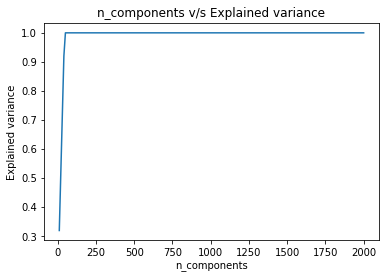

In [ ]:
#plotting curve between n_components and explained variance
plt.plot(n_components, explained_variance)
plt.xlabel('n_components')
plt.ylabel("Explained variance")
plt.title("n_components v/s Explained variance")
plt.show()

As we can see that for n_components=49 it covers explained variance of 99.51% which is great

### Applying k-means clustering

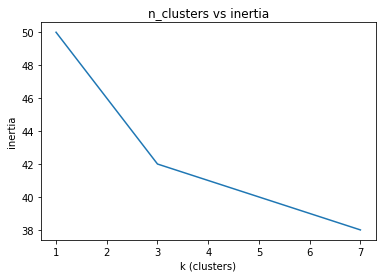

In [ ]:
from sklearn.cluster import KMeans
#applying K-means clustering and finding best k using elbow method
#first put the optimal n_components into truncated svd to find our train data
tsvd=TruncatedSVD(n_components=49)
X_train=tsvd.fit_transform(co_occur_matrix)

K=[1,2,3,4,5,6,7]
inertia=[]

for k in K:
    model=KMeans(n_clusters=k)
    model.fit(X_train)
    inertia.append(model.inertia_)
plt.plot(K,inertia)
plt.xlabel('k (clusters)')
plt.ylabel('inertia')
plt.title('n_clusters vs inertia')
plt.show()

In [ ]:
#training our model at k=3
model=KMeans(n_clusters=3).fit(X_train)

## Wordclouds of clusters obtained in the above section

In [ ]:
cluster1,cluster2,cluster3=[],[],[]
for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(top_3000_features[i])
    elif model.labels_[i] == 1:
        cluster2.append(top_3000_features[i])
    else:
        cluster3.append(top_3000_features[i])


# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))

No. of reviews in Cluster-1 :  2998

No. of reviews in Cluster-2 :  1

No. of reviews in Cluster-3 :  1


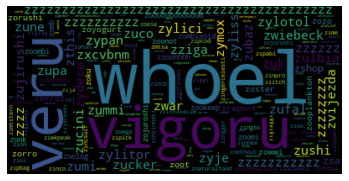

In [ ]:
#for cluster1
data=''
for i in cluster1:
    data=data+i+' '
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black").generate(data)
# Display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

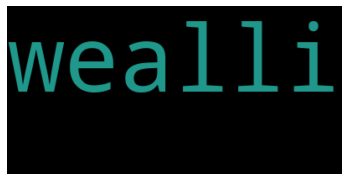

In [ ]:
#for cluster2
data=''
for i in cluster2:
    data=data+i+' '
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black").generate(data)
# Display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

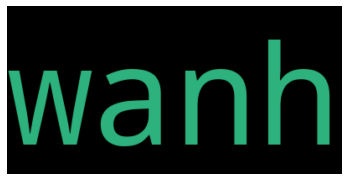

In [ ]:
#for cluster3
data=''
for i in cluster3:
    data=data+i+' '
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black").generate(data)
# Display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Function that returns most similar words for a given word

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def similar_word_10(word):
    similarity = cosine_similarity(co_occur_matrix)
    word_vect = similarity[top_3000_features.index(word)]
    print("Similar Word to",word)
    index = word_vect.argsort()[::-1][1:11]
    for j in range(len(index)):
        print((j+1),"Word",top_3000_features[index[j]] ,"is similar to",word,"\n")

In [ ]:
similar_word_10(top_3000_features[1858])

Similar Word to whatevertheheck
1 Word wouldtak is similar to whatevertheheck 

2 Word wouldov is similar to whatevertheheck 

3 Word wouldownsid is similar to whatevertheheck 

4 Word wouldpres is similar to whatevertheheck 

5 Word wouldrecommend is similar to whatevertheheck 

6 Word wouldreg is similar to whatevertheheck 

7 Word wouldriven is similar to whatevertheheck 

8 Word wouldrugstor is similar to whatevertheheck 

9 Word wouldst is similar to whatevertheheck 

10 Word wouldt is similar to whatevertheheck 



##Observations and Conclusions

1) First we figured our top 3000 words using tfidf score built a co-occurence matrix from those words

2) After applying truncated svd on it we found our optimal n_components to be 49 since it covers 99.50% of explained variance obtained.

3) Then we applied kmeans on using optimal svd values and found our best n_cluster value equal to 3 using elbow method.

4) After that we plotted wordcloud for each clusters and found in some clusters there are few words and at the end we generated a function which return most similar words using cosine similarity of co-occurence matrix.